In [1]:
#library importations
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
image_folders = "/content/drive/MyDrive/Colab Notebooks/Datasets/Images/PetImages/"

In [3]:
os.listdir(image_folders)

['Dog', 'Cat']

In [4]:
#checking the amout of image in both folder
print(f"the amount of images in Dog folder is {len(os.listdir(image_folders + 'Dog/'))}")

print(f"the amount of images in Cat folder is {len(os.listdir(image_folders + 'Cat/'))}")

the amount of images in Dog folder is 12485
the amount of images in Cat folder is 12502


In [5]:
#creating training sets and label from the images
img_category = ['Dog', 'Cat']
#visualizing two images from both of the categories to see

image_list = []
for i in range(2):
  category = img_category[i]
  print(category)
  path = os.path.join(image_folders,category)
  for img_nr in range(2):
    img_name = os.listdir(path)[img_nr]
    img_name = path + '/' + img_name
    print(img_name)
    #now using the image name for visualization
    img_array = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
    image_list.append(img_array)

Dog
/content/drive/MyDrive/Colab Notebooks/Datasets/Images/PetImages/Dog/91.jpg
/content/drive/MyDrive/Colab Notebooks/Datasets/Images/PetImages/Dog/9106.jpg
Cat
/content/drive/MyDrive/Colab Notebooks/Datasets/Images/PetImages/Cat/911.jpg
/content/drive/MyDrive/Colab Notebooks/Datasets/Images/PetImages/Cat/9105.jpg


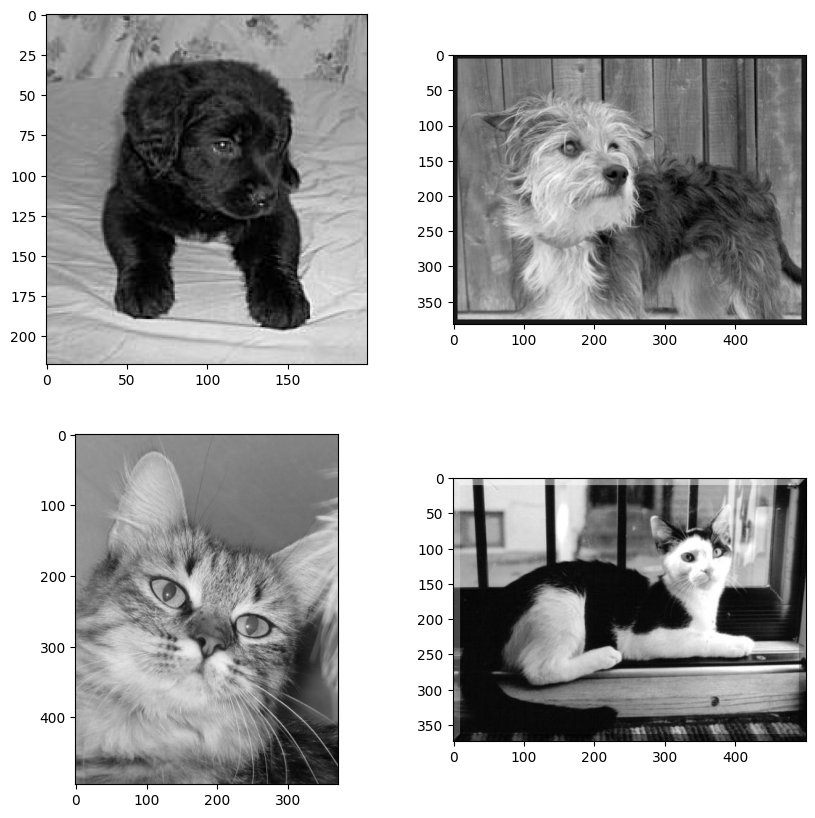

In [6]:
#visualization of the appended image
plt.figure(figsize=(10, 10))
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow( image_list[i], cmap = 'gray')
  #print(img_name)

In [7]:
print (f'the shape of the image {img_array.shape}')

the shape of the image (373, 500)


In [8]:
img_array.shape

(373, 500)

In [9]:
#creating the trainig data set
training_data = []
for category in img_category:
  path = os.path.join(image_folders, category)
  class_num = img_category.index(category)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv2.imread(os.path.join(path, img), 2)
      img_reshaped = cv2.resize(img_array, (200, 200))
      training_data.append([img_reshaped, class_num])
    except Exception as e:  # in the interest in keeping the output clean...
      pass


100%|██████████| 12502/12502 [04:06<00:00, 50.68it/s] 


In [37]:
print(img_category.index(category))
print(category)

1
Cat


In [10]:
len(training_data)

24939

In [11]:
training_data[6]

[array([[ 43,  31,  32, ..., 238, 245, 246],
        [ 38,  31,  31, ..., 239, 247, 248],
        [ 36,  31,  29, ..., 241, 248, 249],
        ...,
        [222, 220, 214, ..., 209, 208, 220],
        [220, 214, 236, ..., 208, 184, 192],
        [228, 229, 229, ..., 209, 189, 212]], dtype=uint8),
 0]

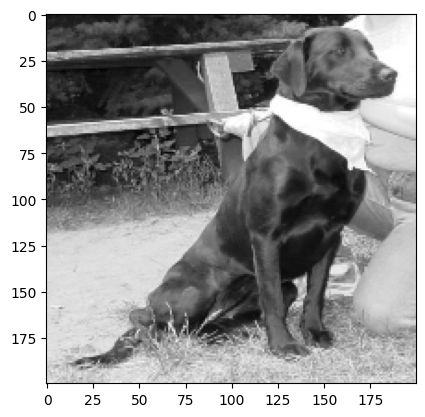

In [12]:
plt.imshow(training_data[6][0], cmap = 'gray')

The cat and dog dataset has been imported and stored as arrays, with each image labeled as either a cat or a dog represented in binary format. These images, along with their corresponding labels, are organized in the "training_data" list. The dataset will undergo further preprocessing to ensure its suitability for training a classification model.
more so, Data shuffling in data science refers to the random rearrangement of data samples in a dataset. Its purpose is to prevent bias and pattern concentration, ensuring a more representative and balanced distribution of classes during model training and evaluation, thus enhancing the model's generalization capability.

In [13]:
#data shuffling to prevent similar class being exposed than other
random.shuffle(training_data)

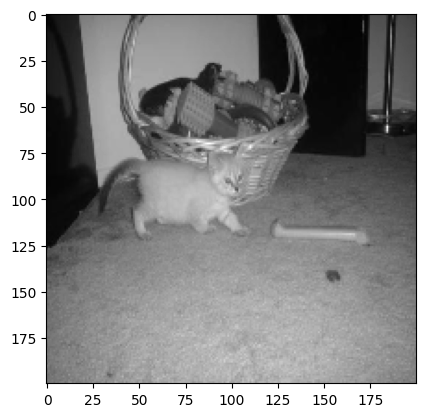

In [14]:
plt.imshow(training_data[6][0], cmap = 'gray')

In [15]:
#previewing the label of the shuffled list
index_sampled = [training_data[i][1] for i in range(10) ]

In [16]:
from numpy.ma import inner
print(len(index_sampled))
index_sampled

10


[1, 1, 1, 0, 1, 0, 1, 1, 1, 0]

In the current data preprocessing step, the dataset is being divided into two separate components: the labels, which represent the target classes or categories, and the images, which contain the actual visual data. This separation is essential for further processing, as it allows us to associate each image with its corresponding label and facilitates the training of machine learning models for classification tasks. By organizing the data in this manner, we can effectively build and validate predictive models that can accurately classify new images based on their respective labels.

In [17]:
#now splitting the data set
x = []
y = []
for features, label in training_data:
  x.append(features)
  y.append(label)
print(len(y))
print(len(x))


24939
24939


1


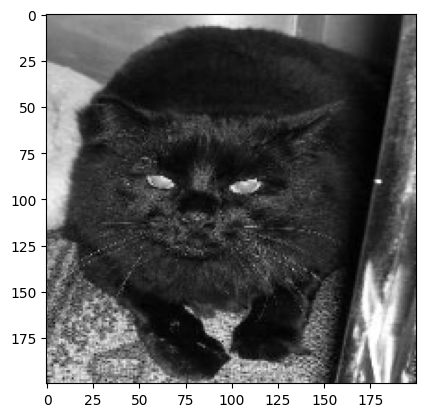

In [18]:
#previewing the first item and examining the binaray representation
plt.imshow(x[0], cmap = 'gray')
print(y[0])


1


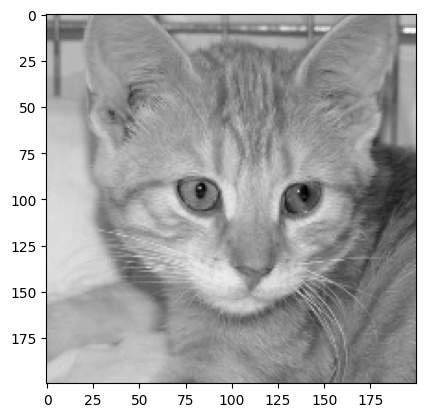

In [19]:
#previewing the first item and examining the binaray representation
plt.imshow(x[2], cmap = 'gray')
print(y[2])

In [20]:
np.max(x)

255

In [23]:
#image pixel scalling ad splitting into train and test data set
print(f'the higest value of the image pixel {np.max(x)}')

train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=32)

the higest value of the image pixel 255


In [24]:
print(len(train_data))
print(len(test_data))

19951
4988


In [25]:
#converting the images into numpy arrays
train_data =  np.array(train_data)
#reshaping the train data into usable format
train_data = np.reshape(train_data, (-1, 200, 200, 1))

In [26]:
print(train_data.shape)
#checking the data type and casting it into usable form
print(f'\n present data type before casting is : {train_data.dtype}')
train_data = train_data.astype('float32')
print(f'\ndata type after type casting is : {train_data.dtype}')

(19951, 200, 200, 1)

 present data type before casting is : uint8

data type after type casting is : float32


In [27]:
#changing the pixel intensity of the train data
train_data = train_data/255.0
print(f'the new pixel intensity is {np.max(train_data)}')

the new pixel intensity is 1.0


In [28]:
#preparing the test data
test_data =  np.array(test_data)
#reshaping the train data into usable format
test_data = np.reshape(test_data, (-1, 200, 200, 1))
print(test_data.shape)
#checking the data type and casting it into usable form
print(f'\n present data type before casting is : {test_data.dtype}')
test_data = test_data.astype('float32')
print(f'\ndata type after type casting is : {test_data.dtype}')
#changing the pixel intensity of the train data
test_data = test_data/255.0
print(f'the new pixel intensity is {np.max(test_data)}')

(4988, 200, 200, 1)

 present data type before casting is : uint8

data type after type casting is : float32
the new pixel intensity is 1.0


In [29]:
test_labels[:20]

[0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]

In [30]:
#label preparation
train_labels = to_categorical(train_labels)
print(f'shape of the encoded label {train_labels.shape}')

shape of the encoded label (19951, 2)


In [31]:
#Building up the CNN model
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=train_data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 256)     2560      
                                                                 
 activation (Activation)     (None, 198, 198, 256)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 256)       590080    
                                                                 
 activation_1 (Activation)   (None, 97, 97, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 256)      0         
 2D)                                                    

In [33]:
# model training
history = model.fit(train_data, train_labels, batch_size=32, epochs=3, validation_split=0.3)

Epoch 1/3
437/437 [==============================] - 118s 228ms/step - loss: 0.7805 - accuracy: 0.5622 - val_loss: 0.6816 - val_accuracy: 0.5647
Epoch 2/3
437/437 [==============================] - 107s 245ms/step - loss: 0.6399 - accuracy: 0.6395 - val_loss: 0.6310 - val_accuracy: 0.6522
Epoch 3/3
437/437 [==============================] - 108s 246ms/step - loss: 0.5780 - accuracy: 0.7010 - val_loss: 0.6774 - val_accuracy: 0.6427


selected smaple shape (1, 200, 200, 1)


1/1 [==============================] - 0s 204ms/step

the predicted label value is 0


the actual label value is 1



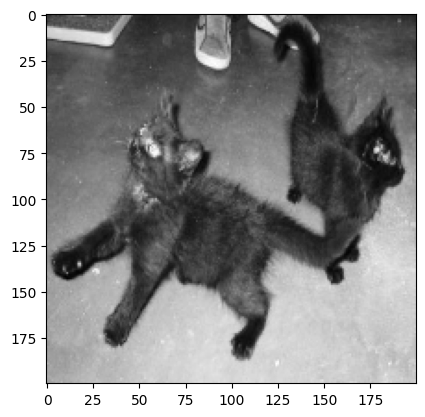

In [44]:
#checking the model performance using the test data
#preparation of the data
selected_index = 5
sample = test_data[selected_index, : , :].reshape(1, 200, 200, 1)
#making prediction
predicted_image = model.predict(sample)
class_obj = np.argmax(predicted_image)
print((f'\nthe predicted label value is {class_obj}\n'))
print((f'\nthe actual label value is {test_labels[selected_index]}\n'))

plt.imshow(sample[0, : , :], cmap = 'gray')

1/1 [==============================] - 0s 23ms/step

the predicted label value is 1


the actual label value is 1



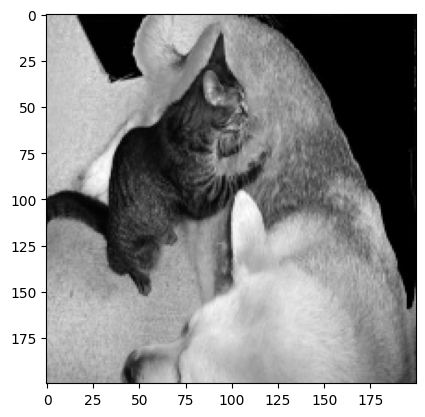

In [43]:
#checking the model performance using the test data
#preparation of the data
selected_index = 505
sample = test_data[selected_index, : , :].reshape(1, 200, 200, 1)
#making prediction
predicted_image = model.predict(sample)
class_obj = np.argmax(predicted_image)
print((f'\nthe predicted label value is {class_obj}\n'))
print((f'\nthe actual label value is {test_labels[selected_index]}\n'))

plt.imshow(sample[0, : , :], cmap = 'gray')

1/1 [==============================] - 0s 21ms/step

the predicted label value is 0


the actual label value is 0



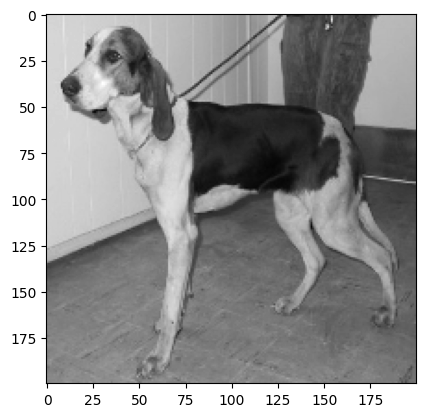

In [41]:
#checking the model performance using the test data
#preparation of the data
selected_index = 95
sample = test_data[selected_index, : , :].reshape(1, 200, 200, 1)
#making prediction
predicted_image = model.predict(sample)
class_obj = np.argmax(predicted_image)
print((f'\nthe predicted label value is {class_obj}\n'))
print((f'\nthe actual label value is {test_labels[selected_index]}\n'))

plt.imshow(sample[0, : , :], cmap = 'gray')

1/1 [==============================] - 0s 24ms/step

the predicted label value is 1


the actual label value is 1



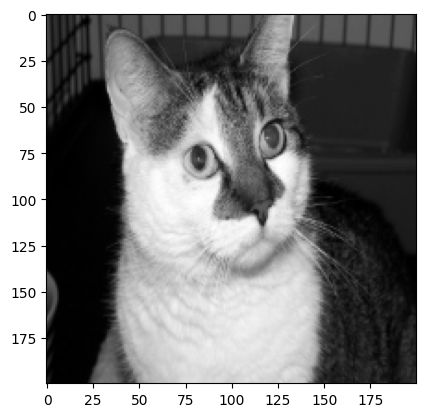

In [42]:
#checking the model performance using the test data
#preparation of the data
selected_index = 595
sample = test_data[selected_index, : , :].reshape(1, 200, 200, 1)
#making prediction
predicted_image = model.predict(sample)
class_obj = np.argmax(predicted_image)
print((f'\nthe predicted label value is {class_obj}\n'))
print((f'\nthe actual label value is {test_labels[selected_index]}\n'))

plt.imshow(sample[0, : , :], cmap = 'gray')

In [ ]:
# Predict on the test data
y_pred = model.predict(test_data)
y_pred_labels = np.argmax(test_labels)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model's performance
accuracy = accuracy_score(np.argmax(test_labels, axis=1), y_pred_labels)